In [1]:
import io

from IPython import display
import numpy as np
from PIL import Image

import deep_dream

In [2]:
cnn = deep_dream.CNN(deep_dream.GOOGLENET_BVLC, cpu_workers=0, gpus=[0])

In [3]:
# Embed JPEGs into the notebook instead of the default of PNG, decreasing file size.

def show(img):
    print(cnn.classify(img, 5))
    if isinstance(img, np.ndarray):
        img = deep_dream.to_image(img)
    buf = io.BytesIO()
    img.save(buf, format='jpeg', quality=85)
    display.display(display.Image(data=buf.getvalue()))

[(0.30501741, 'barn'), (0.27412912, 'boathouse'), (0.074401774, 'lakeside, lakeshore'), (0.053688135, 'worm fence, snake fence, snake-rail fence, Virginia fence'), (0.043849453, 'mobile home, manufactured home')]


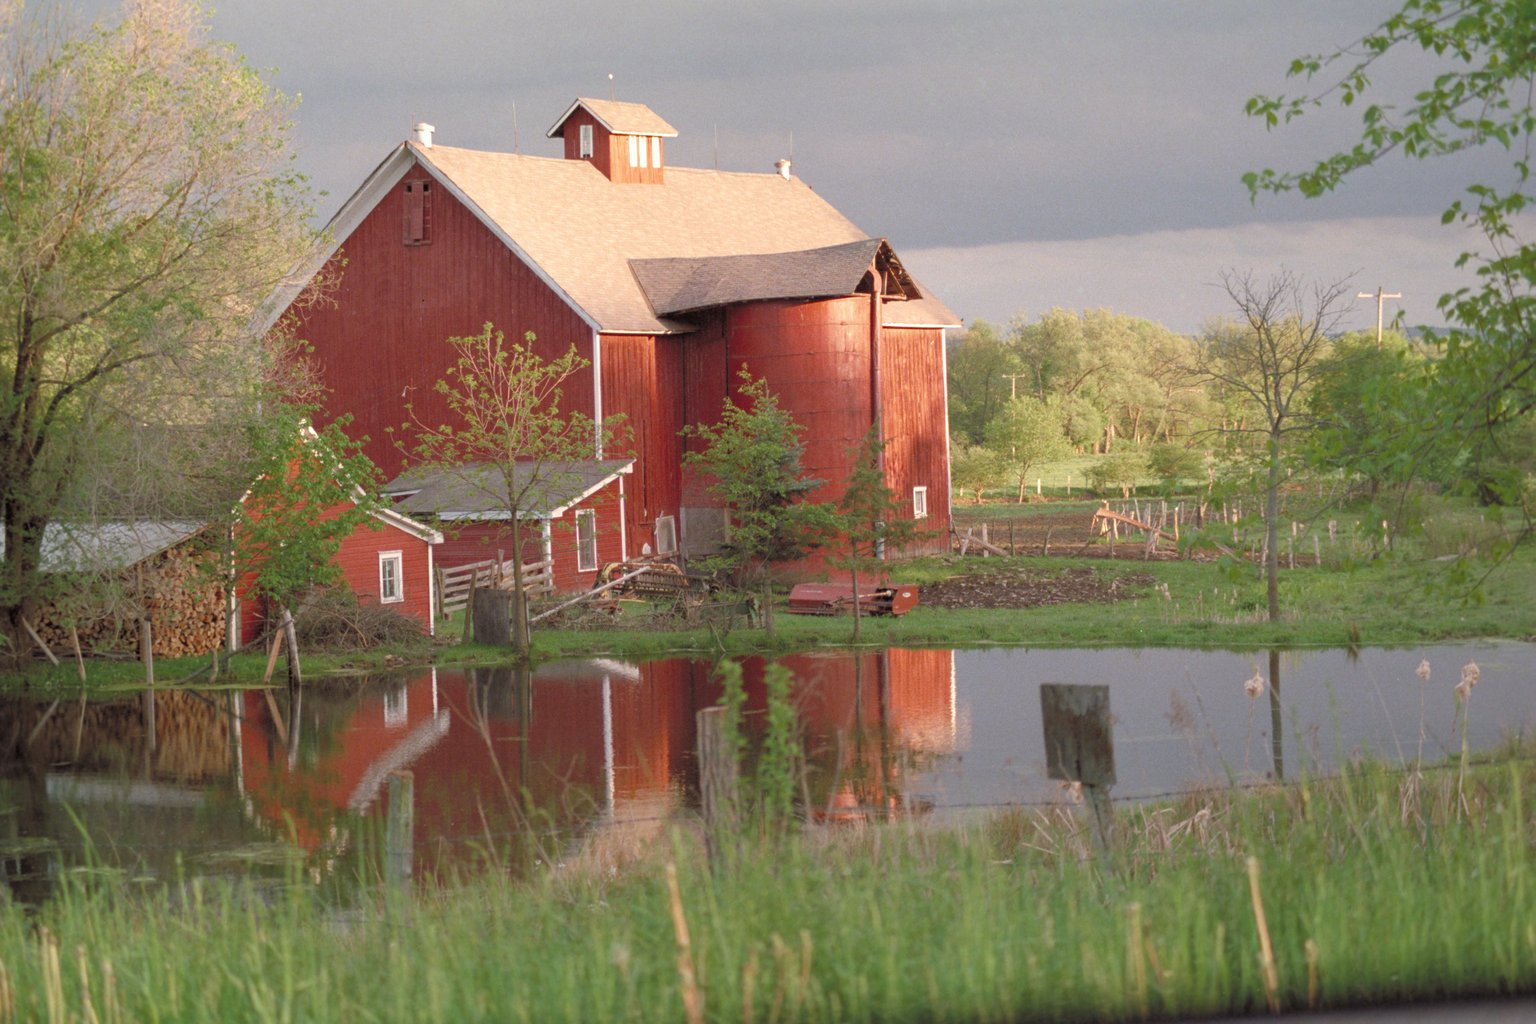

In [4]:
input_img = Image.open('kodim/img0022.jpg').resize((1536, 1024), Image.LANCZOS)
show(input_img)

100%|█████████████████████████████████████| 19.6M/19.6M [00:23<00:00, 905Kpix/s]


[(0.15025383, 'carousel, carrousel, merry-go-round, roundabout, whirligig'), (0.10209873, 'ocarina, sweet potato'), (0.057134908, 'mask'), (0.056414578, 'confectionery, confectionary, candy store'), (0.036051583, 'doormat, welcome mat')]


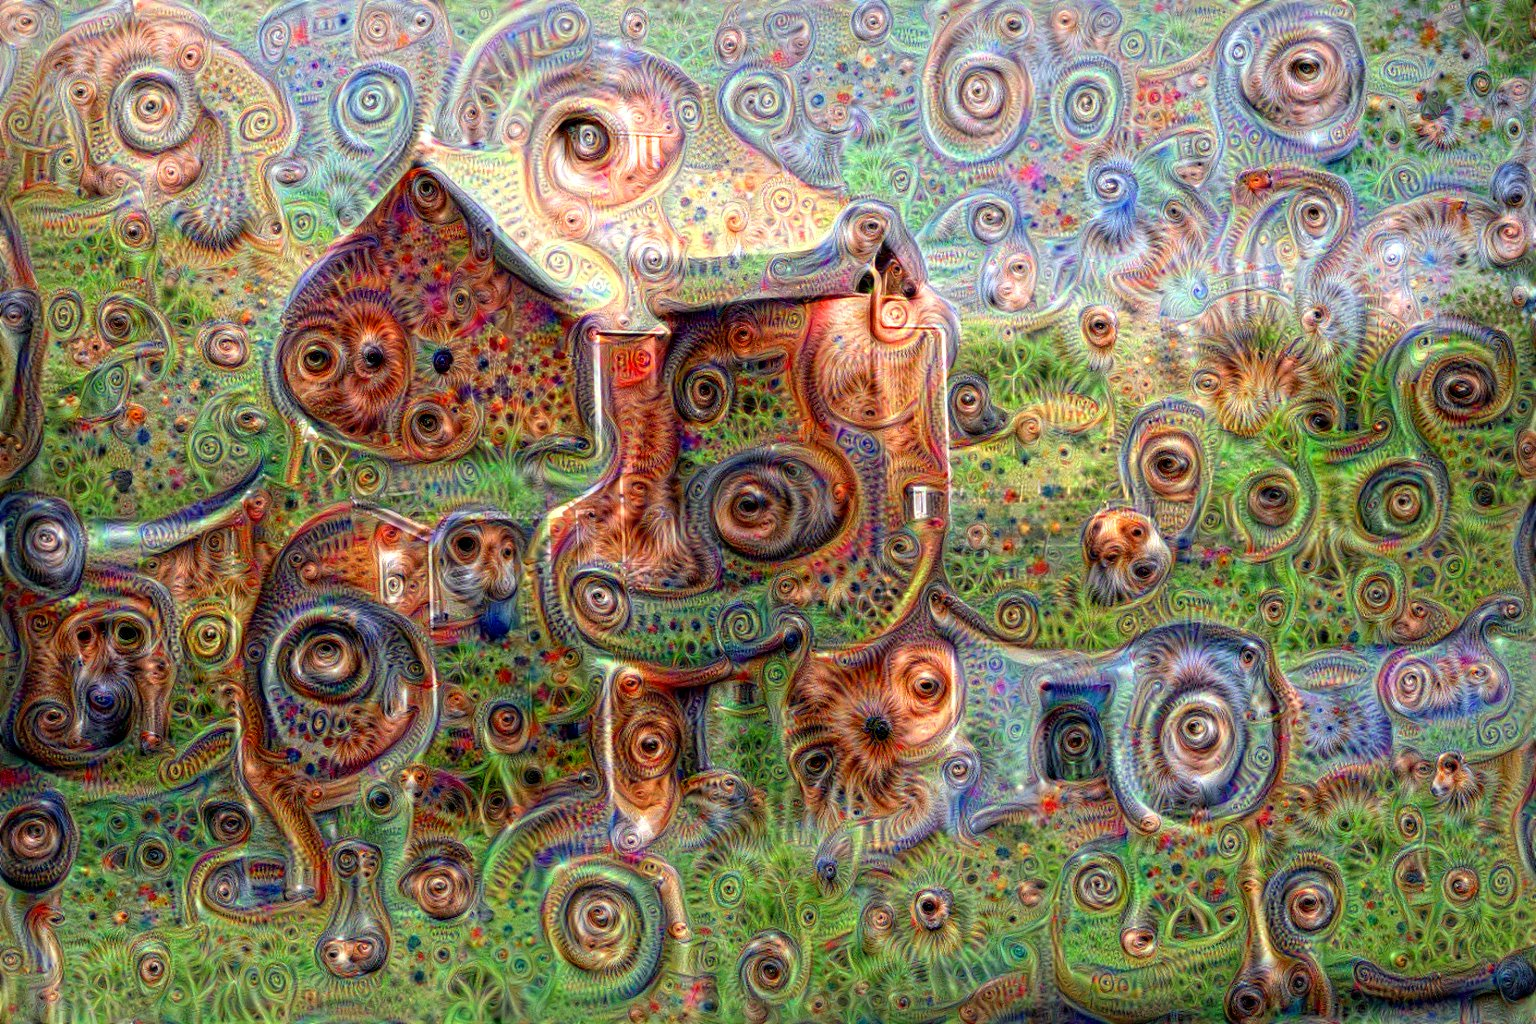

In [5]:
output_img = cnn.dream(input_img, {'inception_4a/pool_proj': 1},
                       scales=7*4, n=2, per_octave=8, step_size=4)
show(output_img)

In [6]:
output_img.save('output.jpg', quality=95)